# Mínimos Quadrados Ordinários

O Método dos Mínimos Quadrados (MMQ), ou Mínimos Quadrados Ordinários (MQO) ou OLS (do inglês Ordinary Least Squares) é uma técnica de otimização matemática que procura encontrar o melhor ajuste para um conjunto de dados tentando minimizar a soma dos quadrados das diferenças entre o valor estimado e os dados observados.

É a forma de estimação mais amplamente utilizada na econometria. Consiste em um estimador que minimiza a soma dos quadrados dos resíduos da regressão, de forma a maximizar o grau de ajuste do modelo aos dados observados.

(https://pt.wikipedia.org/wiki/M%C3%A9todo_dos_m%C3%ADnimos_quadrados)

In [ ]:
# Importando biliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [ ]:
# Criando um DataFrame com dados fictícios
df = pd.DataFrame({
    'x': np.arange(0,11),
    'y': np.arange(0,11) + np.random.randint(0,4,11)
})

In [ ]:
df

,x,y
0,0,3
1,1,1
2,2,5
3,3,3
4,4,6
5,5,8
6,6,7
7,7,9
8,8,9
9,9,11


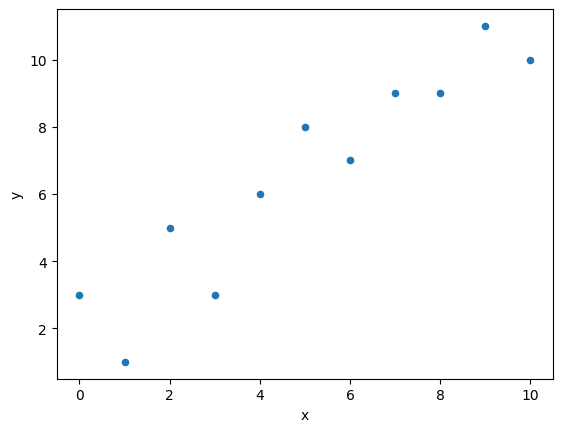

In [ ]:
# Plotando o DataFrame acima em um gráfico de dispersão
df.plot(kind='scatter',
        x='x',
        y='y');

In [ ]:
# Criando dois modelos de regressão linear

modelo1 = LinearRegression() # com intercept ativo
modelo2= LinearRegression(fit_intercept=False) # com intercept desativado

modelo1,modelo2

(LinearRegression(), LinearRegression(fit_intercept=False))

In [ ]:
# Seperando os dados em atributos (variável independente) e rótulos (variável dependente)

atributos = df['x'].to_frame()
rotulos = df['y'].to_frame()

In [ ]:
atributos

,x
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
rotulos

,y
0,3
1,1
2,5
3,3
4,6
5,8
6,7
7,9
8,9
9,11


In [ ]:
# Treinando o modelo1
modelo1.fit(atributos, rotulos)

LinearRegression()

In [ ]:
# Verificando a predição de valores
modelo1.predict(atributos)

array([[ 2.        ],
       [ 2.90909091],
       [ 3.81818182],
       [ 4.72727273],
       [ 5.63636364],
       [ 6.54545455],
       [ 7.45454545],
       [ 8.36363636],
       [ 9.27272727],
       [10.18181818],
       [11.09090909]])

In [ ]:
# Adicionando uma coluna no DataFrame com a predição dos valores do modelo1
df['predicao_modelo1'] = modelo1.predict(atributos)
df

,x,y,predicao_modelo1
0,0,3,2.000000
1,1,1,2.909091
2,2,5,3.818182
3,3,3,4.727273
4,4,6,5.636364
5,5,8,6.545455
6,6,7,7.454545
7,7,9,8.363636
8,8,9,9.272727
9,9,11,10.181818


In [ ]:
# Conferindo o coeficiente e intercept definidos pelo modelo1
print(f'Coeficiente do modelo1: {modelo1.coef_}')
print(f'Intercept do modelo1: {modelo1.intercept_}')

Coeficiente do modelo1: [[0.90909091]]
Intercept do modelo1: [2.]


''

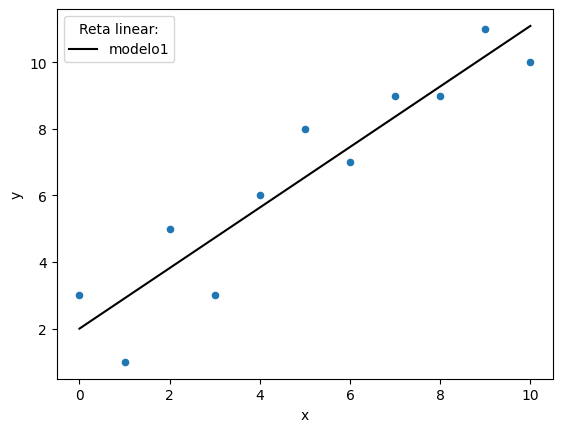

In [ ]:
# Plotando a linha de predição do modelo1 no gráfico de dispersão

# Gráfico de dispersão
df.plot(kind='scatter',
        x='x',
        y='y'
        )

# Gráfico de linha
plt.plot(df['x'],
        df['predicao_modelo1'],
         color='black',
         label='modelo1')

plt.legend(title='Reta linear:')

;

In [ ]:
# Treinando o modelo2
modelo2.fit(atributos, rotulos)

LinearRegression(fit_intercept=False)

In [ ]:
# Verificando a predição de valores
modelo2.predict(atributos)

array([[ 0.        ],
       [ 1.19480519],
       [ 2.38961039],
       [ 3.58441558],
       [ 4.77922078],
       [ 5.97402597],
       [ 7.16883117],
       [ 8.36363636],
       [ 9.55844156],
       [10.75324675],
       [11.94805195]])

In [ ]:
# Adicionando uma coluna no DataFrame com a predição dos valores do modelo2
df['predicao_modelo2'] = modelo2.predict(atributos)
df

,x,y,predicao_modelo1,predicao_modelo2
0,0,3,2.000000,0.000000
1,1,1,2.909091,1.194805
2,2,5,3.818182,2.389610
3,3,3,4.727273,3.584416
4,4,6,5.636364,4.779221
5,5,8,6.545455,5.974026
6,6,7,7.454545,7.168831
7,7,9,8.363636,8.363636
8,8,9,9.272727,9.558442
9,9,11,10.181818,10.753247


In [ ]:
# Conferindo o coeficiente e intercept definidos pelo modelo2
print(f'Coeficiente do modelo1: {modelo2.coef_}')
print(f'Intercept do modelo1: {modelo2.intercept_}')

Coeficiente do modelo1: [[1.19480519]]
Intercept do modelo1: 0.0


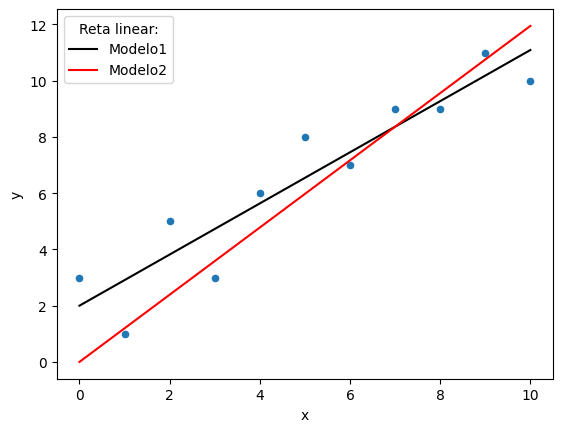

In [ ]:
# Plotando a linha de predição do modelo1 e modelo2 no gráfico de dispersão

df.plot(
    kind='scatter',
    x='x',
    y='y'
)

# Plot da linha do modelo1
plt.plot(df['x'],
         df['predicao_modelo1'],
         color='black',
         label='Modelo1')

# Plot da linha do modelo2
plt.plot(df['x'],
         df['predicao_modelo2'],
         color='red',
         label='Modelo2')

plt.legend(title='Reta linear:');

Ao anilsar o gráfico acima, parece que a reta gerada pelo modelo1 é a melhor. Porém precisamos aplicar a fórmula da soma dos erros quadrados para confirmar esta hipótese:

```
erro = (real - predito)²
```

In [ ]:
# Criando uma nova coluna no df para calcular a diferença do valor real e o valor predito do modelo1
df['erro1'] = (df['x'] - df['predicao_modelo1'])**2
df

,x,y,predicao_modelo1,predicao_modelo2,erro1
0,0,3,2.000000,0.000000,4.000000
1,1,1,2.909091,1.194805,3.644628
2,2,5,3.818182,2.389610,3.305785
3,3,3,4.727273,3.584416,2.983471
4,4,6,5.636364,4.779221,2.677686
5,5,8,6.545455,5.974026,2.388430
6,6,7,7.454545,7.168831,2.115702
7,7,9,8.363636,8.363636,1.859504
8,8,9,9.272727,9.558442,1.619835
9,9,11,10.181818,10.753247,1.396694


In [ ]:
# Criando uma nova coluna no df para calcular a diferença do valor real e o valor predito do modelo2
df['erro2'] = (df['x'] - df['predicao_modelo2'])**2
df

,x,y,predicao_modelo1,predicao_modelo2,erro1,erro2
0,0,3,2.000000,0.000000,4.000000,0.000000
1,1,1,2.909091,1.194805,3.644628,0.037949
2,2,5,3.818182,2.389610,3.305785,0.151796
3,3,3,4.727273,3.584416,2.983471,0.341542
4,4,6,5.636364,4.779221,2.677686,0.607185
5,5,8,6.545455,5.974026,2.388430,0.948727
6,6,7,7.454545,7.168831,2.115702,1.366166
7,7,9,8.363636,8.363636,1.859504,1.859504
8,8,9,9.272727,9.558442,1.619835,2.428740
9,9,11,10.181818,10.753247,1.396694,3.073874


In [ ]:
# Calculando a soma dos erros quadrados
df.loc[:,['erro1', 'erro2']].sum()

erro1    27.181818
erro2    14.610390
dtype: float64

Conforme verificamos os resultados acima, vamos negar a primeira impressão de que o modelo1 é melhor, pois os erros do modelo2 são menores, portanto o modelo2 é melhor.